## Learning Objectives

Today we learn about the second most important tradeoff: the bias variance tradeoff.

## Another way to look at it

Some might say that this class is redundant, we are simply going to rephrase the results that we got last class. That being said we are going to do this for two reasons:

1. This is the common way of looking at the approximation generalization tradeoff, even though in my opinion it should be the other way around
2. The more ways that you can independently verify your conclusion (a classic probablist/data science way of thinking) the stronger you should feel about it

So let's begin in the same way that we did last time, let's make a sine wave:

In [ ]:
%matplotlib inline
import numpy as np
import seaborn as sns

X = np.random.uniform(-1, 1, size=1000)
y = np.sin(np.pi * X)

/Users/nate/Desktop/core-data-science/env/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


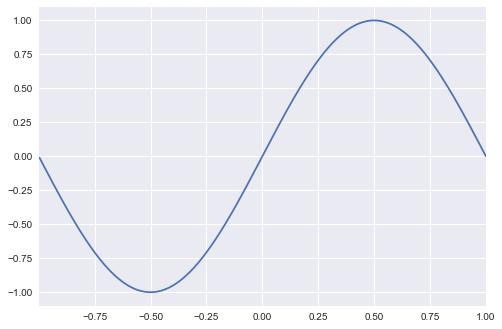

In [1]:
sns.tsplot(y, X)

Wonderful right. This will be the population distribution. Again we are going to be naughty and skip the splitting of training and test and we are just going to get some training data. 

Again we are going to be testing our two hypotheses below:

1. f(X) = w_0 = y
2. f(X) = w_0 + w_1 * x_1 = y

But we are going to be looking at different quantities this time, we are going to be looking at the bias and the variance. So let's start off by defining them:

* Bias: the error of the best hypothesis in your hypothesis set
* Variance: the average error between a hypothesis generated on test data points and the best hypothesis

Then if you add the bias to the variance you will get a measure of what your test error will be. Take the best and then look to see on average how far are you from the best.

*Note: these definitions are contextual*

## Bias

You might notice some strange things about the bias. First it requires us to know the best hypothesis in our set. This is often impossible because we don't know the true distribution. But the second thing is that the bias does not depend on the number data, it only depends on the size of the hypothesis set. Thus once we know the hypothesis set, we know what our bias is.

Fortunately for us I know what the bias is for this data set and for both our hypotheses, but let's show you how you could approximate it.

Once again, it is as easy as training a model on as much data as we can provide it (around 10k will be more than enough). Let's go ahead:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import mean_squared_error

bias0 = 0
bias1 = 0

X = np.random.uniform(-1, 1, size=10000)
y = np.sin(np.pi * X)

In [46]:
best_h0 = LinearRegression(fit_intercept=False)
best_h1 = LinearRegression(fit_intercept=False)

# this hypothesis ignores the X variable
best_h0.fit(np.ones((10000, 1)), y)
# this hypothesis can use the X variable as well as an intercept
best_h1.fit(add_dummy_feature(X[:, None]), y)

# now we score both hypotheses on the traning data
preds = reg0.predict(np.ones((10000, 1)))
bias0 = mean_squared_error(preds, y)
preds = reg1.predict(add_dummy_feature(X[:, None]))
bias1 = mean_squared_error(preds, y)

print bias0
print bias1

0.504649692562
0.196324511153


In truth these numbers should be .5 and .21. So the more complex hypothesis has a lower bias. This will hold true universally.

And just for fun, what do you think these lines look like?

Well the first will be a straight line through 0:

In [47]:
best_h0.coef_

array([ 0.01104962])

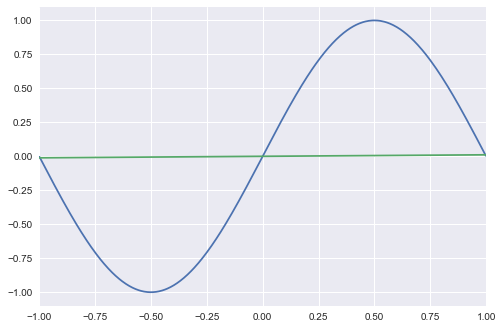

In [48]:
X = np.random.uniform(-1, 1, size=1000)
y0 = np.sin(np.pi * X)
y1 = best_h0.coef_ * X

sns.tsplot(np.array([y0[:, None], y1[:, None]]).T, X)

And the other one would go through zero and almost have a slope of 1:

In [49]:
best_h1.coef_

array([ 0.01213531,  0.95799081])

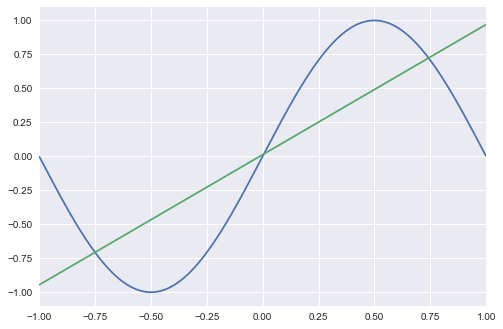

In [50]:
y2 = best_h1.coef_[1] * X + best_h1.coef_[0]

sns.tsplot(np.array([y0[:, None], y2[:, None]]).T, X)

Those are the biases that these two hypothesis sets will have for this particular data set, for ever. They just can't get any better than this. There really isn't any randomness here. 

So the question then becomes why not just use the bigger hypothesis set always? 

Well remember, while the bigger hypothesis does have the ability to make a better hypothesis, the training process is random. Sometimes we will get a hypothesis near the best, and sometimes not. Variance is where the randomness comes in!

## Variance

Variance is different, it is incredibly dependent on the data that you get. If you always are in a data rich environment, then you will have very low variance, but if you don't have enough data, then you will get much higher variance. This is the moving quantity!

Let's start off by exploring what the variance of these two models would be if you only have 2 data points:

In [56]:
h0_scores = []
h1_scores = []
X_real = np.random.uniform(-1, 1, size=1000)

for _ in range(1000):
    X = np.random.uniform(-1, 1, size=2)
    y = np.sin(np.pi * X)
    y0 = best_h0.coef_ * X_real
    y1 = best_h1.coef_[1] * X_real + best_h1.coef_[0]
    
    reg0 = LinearRegression(fit_intercept=False)
    reg1 = LinearRegression(fit_intercept=False)
    
    # this hypothesis ignores the X variable
    reg0.fit(np.ones((2, 1)), y)
    # this hypothesis can use the X variable as well as an intercept
    reg1.fit(add_dummy_feature(X[:, None]), y)
    
    # now we score both hypotheses on the traning data
    preds = reg0.predict(np.ones((1000, 1)))
    h0_scores.append(mean_squared_error(preds, y0))
    preds = reg1.predict(add_dummy_feature(X_real[:, None]))
    h1_scores.append(mean_squared_error(preds, y1))
    

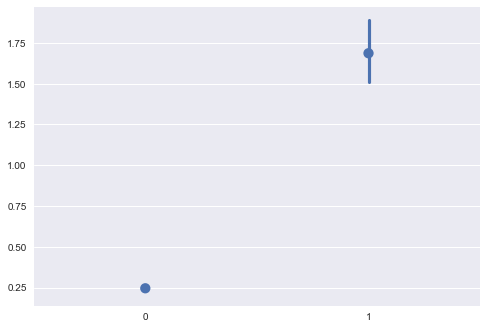

In [57]:
sns.pointplot(data=[h0_scores, h1_scores], join=False)

Wow! Look at the difference between the variances. The first hypothesis set does not have too high a variance, whereas the second hypothesis set has quite a high one. Mathematically the variance of the first is .25 and the variance of the second is 1.69.

So you can see that our estimate of the error of the first hypothesis set training on two data points is:

$$ BIAS + VARIANCE = .5 + .25 = .75$$

Now you might not remember last time, but that is percisely what our out of sample error was! Remember it does not always have to be this, it could be better or worse, but on average it is around this much. 

Whereas our estimate of how the second hypothesis set will do on this data with two data points is:

$$ BIAS + VARIANCE = .21 + 1.69 = 2$$

And again, you might be thinking to yourself, wow that is around what we had gotten before! 

## The trade off

This should make the trade off very clear. the bigger the hypothesis set (the more complex it is/the number of infinite parameters) the lower the bias, but also the higher the variance.

As always there is one saving grace here. The more data points, the lower your variance will be over all.

As we showed before let's check out how the bias and the variance change as we add more data points to verify what we said above:

In [60]:
h0_var = []
h1_var = []
X_real = np.random.uniform(-1, 1, size=1000)

for num_points in range(2, 40):

    h0_scores = []
    h1_scores = []
    for _ in range(1000):
        X = np.random.uniform(-1, 1, size=num_points)
        y = np.sin(np.pi * X)
        y0 = best_h0.coef_ * X_real
        y1 = best_h1.coef_[1] * X_real + best_h1.coef_[0]

        reg0 = LinearRegression(fit_intercept=False)
        reg1 = LinearRegression(fit_intercept=False)

        # this hypothesis ignores the X variable
        reg0.fit(np.ones((num_points, 1)), y)
        # this hypothesis can use the X variable as well as an intercept
        reg1.fit(add_dummy_feature(X[:, None]), y)

        # now we score both hypotheses on the traning data
        preds = reg0.predict(np.ones((1000, 1)))
        h0_scores.append(mean_squared_error(preds, y0))
        preds = reg1.predict(add_dummy_feature(X_real[:, None]))
        h1_scores.append(mean_squared_error(preds, y1))
        
    h0_var.append(h0_scores)
    h1_var.append(h1_scores)


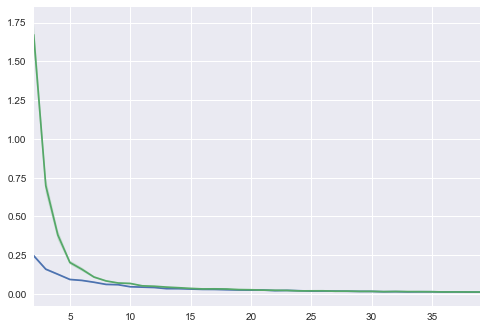

In [61]:
# now we plot them :)
sns.tsplot(np.array([h0_var, h1_var]).T, range(2, 40))

Notice that the variance drops a ton for the second hypothesis, and becomes near 0 as we get 40 points. But remember, above is just the variance. While it is nice to see that go down, we are looking for our approximation of what the actual error will be. In this case we need to add the bias to the above estimates:

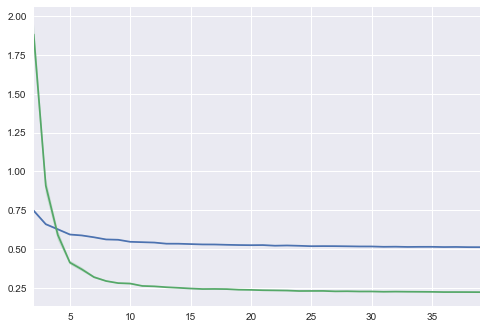

In [62]:
h0_error = np.array(h0_var) + .5
h1_error = np.array(h1_var) + .21

sns.tsplot(np.array([h0_error, h1_error]).T, range(2, 40))

And now we see something magical. There is a point where the errors cross each other! Yes if we have too few data points then the simpler hypothesis set is better. This is because the variance is so high for the first hypothesis set. But after we get to a reasonable number of data points, the more complex hypothesis is better because it has lower bias!

Notice as well that both errors approach the bias. 

As one final note, the above curves are approximations as to what the real ones will look like, but they are pretty good approximations if I can say so myself :)

## Putting it all together

Let's finally put it all together.  Let's see what happens as I change the size of the hypothesis set and the number of training examples. And let's check what happens to the bias, the variance and the estimated test error as we change the above.

We will start off with the bias, this is a little simple because it will not change as the number of points do:

In [81]:
from sklearn.preprocessing import PolynomialFeatures
biases = []
best_models = []

for model_complexity in range(5):
    X = np.random.uniform(-1, 1, size=10000)
    y = np.sin(np.pi * X)
    poly = PolynomialFeatures(model_complexity)
    X = poly.fit_transform(X[:, None])

    reg = LinearRegression(fit_intercept=False)

    reg.fit(X, y)

    preds = reg.predict(X)
    
    best_models.append(reg)
    biases.append([mean_squared_error(preds, y)])


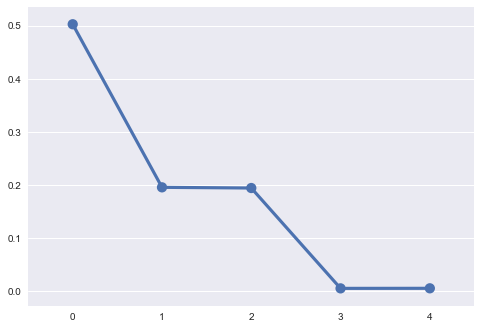

In [82]:
sns.pointplot(data=biases)

As the model complexity increases, the bias decreases (notice that it might go down in fits and starts). 

Let's see what happens to the variance:

In [89]:
X_real = np.random.uniform(-1, 1, size=1000)

model_vars = []
for model_complexity in range(5):
    variances = []
    for num_points in range(2, 40):

        var = 0
        for _ in range(100):
            poly = PolynomialFeatures(model_complexity)

            X_real_tran = poly.fit_transform(X_real[:, None])
            y_best = best_models[model_complexity].predict(X_real_tran)
            X = np.random.uniform(-1, 1, size=num_points)
            y = np.sin(np.pi * X)

            X = poly.fit_transform(X[:, None])
            reg = LinearRegression(fit_intercept=False)
            reg.fit(X, y)

            preds = reg.predict(X_real_tran)
            var += mean_squared_error(preds, y_best)

        var /= 100
        variances.append(var)
        
    model_vars.append(variances)
    

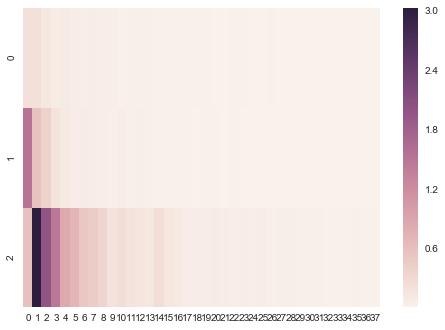

In [90]:
sns.heatmap(model_vars[:3])

Again the variance increases as we get more complex models, but it then decreases later on as we get more data points. This is what we expect. Finally we show off the bias variance combination:

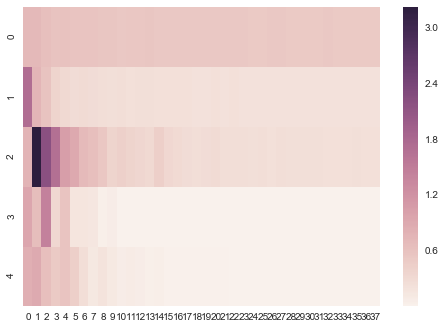

In [92]:
sns.heatmap(np.array(model_vars) + np.array(biases))

## Conclusion

There you have it. Notice that there is a time when the second hypothesis set does better, but as the data increases, the fourth hypothesis wins the day. And then finally as we get even more data, the final and most complex hypothesis will win out. 

This is the fundamental nature of things here, complexity is good, but only when you have the data.

Next time we will show this off one final time with an analysis of why this fundamentally happens. But until then, remember either one of the above: the bias variance trade off of the approximation generalization trade off.

## Learning Objectives

Today we learn about the second most important tradeoff: the bias variance tradeoff.

## Comprehension Questions

1.	Where does the randomness come in training an ML algorithm (say linear regression)?
2.	Do we ever really know the bias of a model if you only have a sample from a population?
3.	Does bias depend on your data sample?
4.	Why does bias + variance = test error?
5.	When you have a lot of data points are low bias models better than high bias ones?
6.	Why does variance always seem to work against us?
7.	What is the lowest bias model?
